<a href="https://colab.research.google.com/github/annsarapaul/ISLR-python/blob/master/Notebooks/Ann/Chapter%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 - Linear Regression

- [Load Datasets](#Load-Datasets)
- [3.1 Simple Linear Regression](#3.1-Simple-Linear-Regression)
- [3.2 Multiple Linear Regression](#3.2-Multiple-Linear-Regression)
- [3.3 Other Considerations in the Regression Model](#3.3-Other-Considerations-in-the-Regression-Model)

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import scipy
import math
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Datasets
Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html

#### Downloading Files so Colab can use

In [2]:
data_folder = '/content/Data' 

In [3]:
!wget -q https://raw.githubusercontent.com/annsarapaul/ISLR-python/master/Notebooks/Data/Advertising.csv  -P $data_folder
!wget -q https://raw.githubusercontent.com/annsarapaul/ISLR-python/master/Notebooks/Data/Credit.csv -P $data_folder
!wget -q https://raw.githubusercontent.com/annsarapaul/ISLR-python/master/Notebooks/Data/Auto.csv -P $data_folder
#Data/Advertising.csv'

In [4]:
advertising = pd.read_csv(data_folder + '/Advertising.csv', usecols=[1,2,3,4])
advertising.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
credit = pd.read_csv('Data/Credit.csv', usecols=list(range(1,12)))
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [6]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## 3.1 Simple Linear Regression

Linear Equation

$\hat{y}= \beta _{0} + \beta _{1}X$

**Least Square Approximation** is used to calculate $\beta _{0}$ and $\beta _{1}$ with minimum RSS

$\hat{\beta_{1}} = \frac{\sum (x_{i}-\bar{x})*(y_{i}-\bar{y})}{\sum (x_{i}-\bar{x})^2}$

$\hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}} *\bar{x}$



#### Model Accuracy


##### Residual sum of squares (RSS)

RSS = $\sum_{}^{n}(y_{i} - \hat{y_{i}})^2$

##### Residual Square Error (RSE)

RSE = $\sqrt(\frac{RSS}{n-p-1})$

##### R2 Error

More useful since RSE and RSS are absolute values and this ranges in values 0-1. R2 is good when closer to one

R2 = 1 - RSS/TSS

TSS = Total Sum of Squares

TSS = $\sum_{}^{n}(y_{i} - \bar{y})^2$

For just one predictor R2 = corr(x,Y)

In [12]:
y_pred = b[0] + m[0]*advertising['TV']
rss = ((y_pred - advertising['Sales'])**2).sum()

#rse = math.sqrt(sigma_2)
n = len(y_pred)

y_avg = advertising['Sales'].sum()/(len(y_pred))
tss = ((y_pred - y_avg)**2).sum()
r2 = 1 - rss/tss
print(r2)


0.36567940037641433


##### Standard Error in Beta

Standard Errors . $\sigma$ = $\sqrt(\frac{RSS}{n-2})$

$SE(\beta_{0} )^{2}= \sigma ^{2}[\frac{1}{n} + \frac{\bar{x}^2}{\sum ^{n}(x_{i}- \bar{x})^2}]$


$SE(\beta_{1} )^{2}= \frac{\sigma ^{2}}{\sum ^{n}(x_{i}- \bar{x})^2}$

Confidence interval - 95%

$\beta_{1} \pm 2\cdot SE(\beta_{1})$

In [13]:
y_pred = b[0] + m[0]*advertising['TV']
rss = ((y_pred - advertising['Sales'])**2).sum()
sigma_2 = rss/(len(y_pred)-2)
rse = math.sqrt(sigma_2)
n = len(y_pred)
x_avg = advertising['TV'].sum()/(len(y_pred))
x_val = ((advertising['TV']- x_avg)**2).sum()
SE_B0 = math.sqrt(sigma_2*(1.0/(len(y_pred))+ x_avg**2/x_val))
SE_B1 = math.sqrt(sigma_2/x_val)
print('SE for B1 = '+ str(SE_B1))
print('SE for B0 = '+ str(SE_B0))
print('B0 = '+ str(b[0]))
print('B1 = '+ str(m[0]))

SE for B1 = 0.0026906071877968707
SE for B0 = 0.4578429402734785
B0 = 7.0325935491276965
B1 = 0.04753664043301974


##### T statistic - Is X and Y related?**bold text**

$t = \frac{\beta_{1}-0}{SE(\beta_{1})}$

p-value = Probability that $\beta_{1} = 0$

Low value for p-value indicates lower probablity and hence $\beta_{1} != 0$ and X is related to Y


In [15]:
t0 = b[0]/SE_B0
t1 = m[0]/SE_B1
print('t0 = '+ str(t0))
print('t1 = '+ str(t1))

t0 = 15.360275174117552
t1 = 17.667625600875542


##### P - Value

 ( needs t-statistic and degress of freedom)

In [16]:

pval0 = scipy.stats.t.sf(np.abs(t0), n-2)*2  # two-sided pvalue = Prob(abs(t)>tt)
pval1 = scipy.stats.t.sf(np.abs(t1), n-2)*2 
print('pval0 = '+ str(pval0))
print('pval1 = '+ str(pval1))

pval0 = 1.4063004765084694e-35
pval1 = 1.4673897001946964e-42


##### Pearson's Correlation term 

In [17]:
corr, _ = scipy.stats.pearsonr(advertising['TV'], advertising['Sales'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.782


### Linear Plots


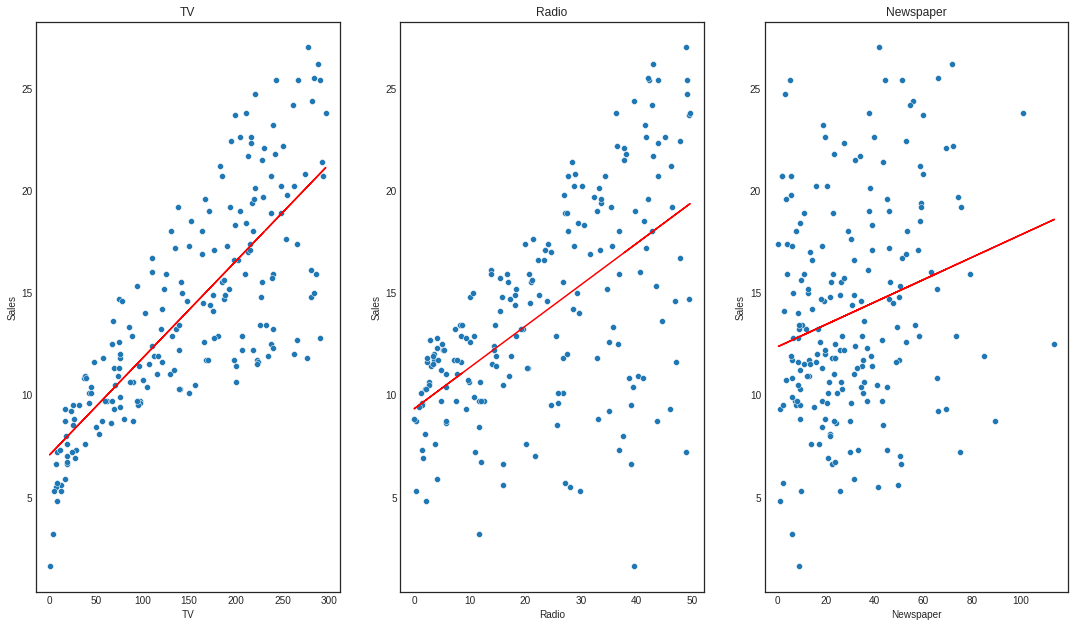

In [18]:
# Update Params
channels = ['TV', 'Radio','Newspaper']
y_target_field = 'Sales'
df = advertising

# Params update complete
fig, axs = plt.subplots(1,len(channels))
fig.set_size_inches(18.5, 10.5)
plt.figure(1)
i = 0
m = [0]*len(channels)
b = [0]*len(channels)

for channel in channels:
    #axs[i] = sns.scatterplot(data=advertising, x=channel, y="Sales")
    sns.scatterplot(data=df, x=channel, y=y_target_field,ax=axs[i]).set_title(channel)
    m[i], b[i] = np.polyfit(df[channel], df[y_target_field], 1)
    axs[i].plot(df[channel], m[i]*df[channel] + b[i],color='r')
    i = i +1

### Contour Plots

In [19]:
b0 = b[0]
m0 = m[0]
print(b0)
print(m0)


7.0325935491276965
0.04753664043301974


Text(0.5, 1.0, 'Contour Plot')

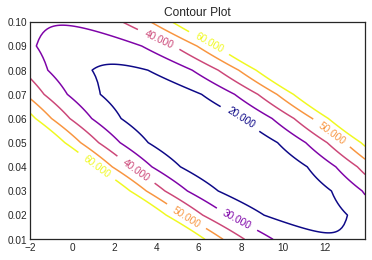

In [20]:
#Adjust the range

b0_contour = np.arange(-2,14,0.1)
m0_contour = np.arange(0.01,0.11,0.01)
levels_vals =  [20,30,40,50,60]
# Params end, Confirm that length is same

y = advertising['Sales']
x = advertising['TV']
rss= np.empty([len(m0_contour), len(b0_contour)])

for column in range(len(b0_contour)):
  for row in range(len(m0_contour)):
    y_pred =b0_contour[column] + m0_contour[row]*x
    rss[row][column] = (((y_pred - y)**2).sum())/float(len(y))

CS = plt.contour(b0_contour, m0_contour, rss, cmap= 'plasma', levels = levels_vals)
plt.clabel(CS, inline=True, fontsize=10)
plt.title('Contour Plot')

## 3.2 Multiple Linear Regression

Used so we can capture synergy between variables

In [21]:
from sklearn.linear_model import LinearRegression
predictors = ['Radio','TV','Newspaper']
X= advertising[predictors]
y = advertising['Sales']
reg = LinearRegression(fit_intercept=True).fit(X, y)

In [22]:
print('Coefficient for intercept  = ' + str(reg.intercept_))
for i in range(len(predictors)):
  print('Coefficient for '+ predictors[i] + ' = '+str(reg.coef_[i]))


Coefficient for intercept  = 2.9388893694594067
Coefficient for Radio = 0.18853001691820434
Coefficient for TV = 0.04576464545539764
Coefficient for Newspaper = -0.0010374930424763007


In [23]:
y_pred = reg.predict(X)
rss = ((y_pred - y)**2).sum()
sigma_2 = rss/(len(y_pred)-2)
rse = math.sqrt(sigma_2)
n = len(y_pred)
SE = []
t = []
p = []
for i in range(len(predictors)):
  x_avg = X[predictors[i]].sum()/(n)
  x_val = ((X[predictors[i]]- x_avg)**2).sum()
  SE_B = math.sqrt(sigma_2/x_val)
  SE.append(SE_B)
  t_val = reg.coef_[i]/SE_B
  t.append(t_val)
  pval = scipy.stats.t.sf(np.abs(t_val), n-2)*2  # two-sided pvalue = Prob(abs(t)>tt)
  p.append(pval)
SE

[0.008006951638700984, 0.0013846455127335701, 0.005458457812550267]

In [24]:
table = pd.DataFrame(data={'predictors': predictors
                           ,'Co-eff': reg.coef_
                          ,'SE': SE
                          ,'t': t
                          ,'p': p})

In [25]:
table

,predictors,Co-eff,SE,t,p
0,Radio,0.188530,0.008007,23.545792,2.628916e-59
1,TV,0.045765,0.001385,33.051525,1.573515e-82
2,Newspaper,-0.001037,0.005458,-0.190071,8.494484e-01


### F-statistic (Relationship between any X and y)

This is useful when predictors is large, if we calculated t=statistic individually and large number of features, then by pure chance one of them could have good t-statistic with low p-value and indicate relationship


$F = \frac{(TSS-RSS)/p}{RSS/(n-p-1)}$

when there is no relationship between the response and predictors, one would expect the F-statistic to take on a value close to 1. Else we expect F to be greater than 1.

 Calculate p-value using F statistic

F-statistic does not work when p > n


In [26]:
y_avg = y.sum()/n
tss = ((y_pred - y_avg)**2).sum()
p = len(p)
f = (tss-rss)*(n-p-1)/(rss*p)
print(f)

504.93737032576166


### Variable Selection

Forward Selection
Backward Selection
Mixed

adding one predictor at a time that has lowest RSS and need a stopping condition

### R2

R2 = Corr$(\hat{y} , y$)

R2 will increase with number of variables even if they are not good predictors. This is because this gives linear regression more degress of freedom.

If adding a given predictor does not significantly improve the R2 score, the variable is likely a weak predictor

In [27]:
corr, _ = scipy.stats.pearsonr(y_pred, y)
print(corr)


0.947212034435243


### Synergy Effect

When one predictor value influences the effect of another. Adding an $X_{1}*X_{2}$ term will help with modeling


**Hierarchical principle**  states that if we include an interaction in a model, we hierarchical
should also include the main effects, even if the p-values associated with principle
their coefficients are not significant

More significant for qualitative terms to add interaction w/o interaction the change in one of numeric/quantitative fields results in same increase irespective of the qualitative. Hence interaction terms are also important here.

## Regression Considerations

### One Hot encoding

The values themselves don't matter (0 or 1)

### Non- Linearity fo Data


#### Residual Plots

Plot of $\hat{y} - y$ vs x

Ideally there should not be a pattern in residuals, if there is data might be non linear

In [35]:
from sklearn.linear_model import LinearRegression
auto['horsepower_2'] = auto['horsepower']**2
y_auto = auto['mpg']
reg1 = LinearRegression(fit_intercept=True).fit(auto[['horsepower','horsepower_2']], y_auto)
reg2 = LinearRegression(fit_intercept=True).fit(auto[['horsepower']], y_auto)

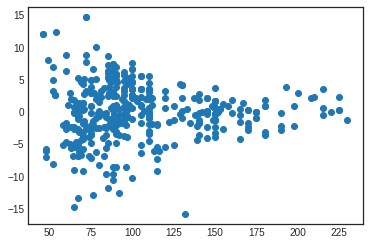

In [36]:
Y_axis = reg1.predict(auto[['horsepower','horsepower_2']]) - y_auto
X_axis = auto['horsepower']
plt.scatter(X_axis,Y_axis)

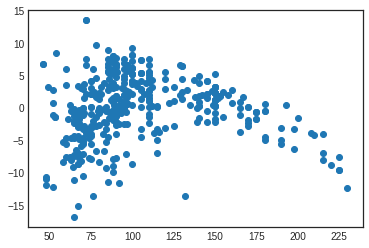

In [38]:
Y_axis = reg2.predict(auto[['horsepower']]) - y_auto
X_axis = auto['horsepower']
plt.scatter(X_axis,Y_axis)

### Error Corelation

Example - if the data is doubled the confidence intervals would be narrower by a factor of √2

Time series data could have correlation. If adjusant values have similar residuals

### Non-constant Variance of Error Terms

Look for **heteroscedasticity** in the residual plots

When faced with this problem, one possible solution is to transform the response Y using a concave function such as log Y or √Y

**Weighted least squares** - When error variance changes???

### Ourliers and Leverage

**Outliers** - when y is way off from regression line. 
Has minimal impact on line but impacts RSE and R2 values

calculate **studendized residuals** to identify outliers. > 3 can be outliers

=  dividing each residual $e_{i}$ by its estimated standard error

**High Leverage points** - Impacts the regression line significantly

Calculate Leverage statistic 

### Collinearity

Perdictors have high co-relation can cause issues. Find corr or pairwise plots to identify
Why: Countours are very thin and high chance of errors

It also reduces the **power** of t-statistic and p-value. We might accept the null hypothese falsely

Collinearity can occue > 2 variables, hence use variance inflation factor 

$VIF(\hat{\beta_{j}})= \frac{1}{1-R_{X_{j}| X_{-j}}^{2}{}}$

if VIF > 5/10 ... investigate

Drop collinear variables or combine them to form a new one